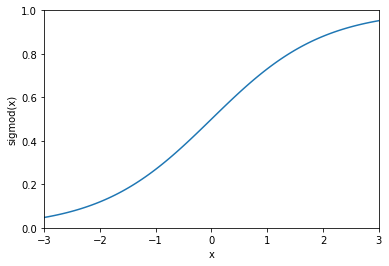

In [21]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-3,3,100)
plt.xlim(-3,3)
plt.ylim(0,1)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sigmod(x)')
plt.show()


In [36]:
import numpy as np
class LR(object):
    def __init__(self,eta=0.01,n_iter=20):
        self.eta=eta
        self.n_iter=n_iter
        
    def _initialize_w(self,m):
        self.w=np.zeros(m+1)
        
    def _net_input(self,xi):
        z=xi.dot(self.w[1:])+self.w[0]
        return  1/(1+np.exp(-z))
    def predict(self,xi):
        return np.where(self._net_input(xi)>=0.5,1,-1)
    def fit(self,X,y):
        self._initialize_w(X.shape[1])
        for i in range(self.n_iter):
            output=self._net_input(X)
            error=(y-output)
            self.w[1:]+=self.eta*X.T.dot(error)
            self.w[0]+=self.eta*sum(error)
            
        return self
    
    
    

In [48]:
import pandas as pd
df=pd.read_table(r'E:\Repository\algorithms\LRdata.txt',header=None)
X=df.iloc[0:100,[0,1]].values
y=df.iloc[0:100,2].values

lgr=LR(eta=0.1,n_iter=50)
lgr.fit(X,y)
lgr.w



array([ 71.41824329,  18.21882335, -10.16215333])

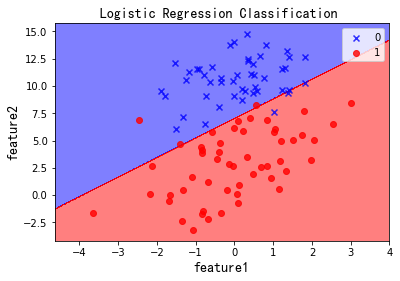

In [49]:

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r'C:\Windows\Fonts\simkai.ttf',size=14)
def plot_decision_region(X,y,classifer,resolution=0.02):
   
    
    
    #找出各个样本的最值，分界面由权重决定，对x1,x2进行放缩并不会影响分界面，但可以使分界面更美观
    x1_min,x2_min=X[:,0].min()-1,X[:,1].min()-1
    x1_max,x2_max=X[:,0].max()+1,X[:,1].max()+1
    #print(x1_min)
    #将向量矩阵变为坐标矩阵
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #print(xx1)
    #Z是分界决策面所对应的分类决策，+1，-1将其对应于 contourf的等高线绘制高度，进而进行填充，画出分界区域
    Z=classifer.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #高度需要与contourf(x,y,z)的维度相对应
    Z=Z.reshape(xx1.shape)
    #print(xx1.shape)
    #print(Z)
    
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    #colors[:len(np.unique(y))]对应于不同类所要选择的颜色，二分类问题会在red,blue内进行选择
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #其中的alpha参数设置颜色填充的透明度
    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    #plt.contour(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    #设定所画图形界面
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    markers = ('x', 'o', 's', '^', 'v')
    
    for idx, cl in enumerate(np.unique(y)):
        #用y==1和y==-1来做索引
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

    
plot_decision_region(X, y, classifer=lgr)
plt.xlabel('feature1',fontproperties=font)
plt.ylabel('feature2',fontproperties=font)
plt.legend(loc='upper right')
plt.title('Logistic Regression Classification ',fontproperties=font)
#plt.savefig(r'C:\Users\Administrator\Desktop\工作报告\LRsample.png',dpi=600)
plt.savefig(r'C:\Users\Administrator\Desktop\工作报告\LRclassificationBGD.png',dpi=600)
plt.show()